# Pre-processing nextnano3D data and loading potentials tutorial

This tutorial will show you how to use the potential module to pre-process 
simulation data from nextnano++. 

Specifically, take a 3D potential lanscape 
and process the data format to produce 2D slices at a user-specified 
z-coordinate for various control voltages used during the simulation runs. 

Next,
the tutorial will show how to the load pre-processed 2D potential files.

## 1. Load the relevant modules and process the NextNano 3D data

First, the working directory will be changed to run the tutorial from the 
desired directory.

In [1]:
import os
from pathlib import Path
path = Path(os.getcwd())

# update base working directory to QuDiPy
if path.stem != 'QuDiPy':
    base_dir = path.parents[1]
    os.chdir(base_dir)
else:
    base_dir = path

Next, the relevant modules are loaded, and the input/output data directories are 
specified.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import qudipy.potential as pot

General directory where tutorial files are stored.

In [3]:
nav_dir = os.path.join('QuDiPy data', 'tutorials')

Sub-directory where raw nextnano data is stored.

In [4]:
nextnano_dir = os.path.join(base_dir, nav_dir,
                                    'nextnano','2QD_dotsep_60nm')

Sub-directory where to save processed nextnano 2D potentials and electric fields,
as well as, relevant metadata about the simulations performed in nextnano.

In [5]:
processed_dir = os.path.join(base_dir, nav_dir,
                            'processed','2QD_processed')

Note the nextnano file structure:

    /simulation_runs
        /simulation_run_#_with_ctrl_names/values
            /output directory
                /bias_000_000_000
                    data files
                /Structure
                    data files
                data files
            data files
            simulation run log file

Data file types to be referenced/imported: *.coord, *.dat, *.fld

NOTE: these may change slightly depending on the version of nextnano. These 
changes are accounted for in QuDiPy.


Define the desired z-coordinate to extract 2D potential/electric field slices. 

In [6]:
z = -0.2 # units: nm <- default for nextnano

For a given user specified z-coordinate slice, the relevant metadata about the 
batch of nextnano simulations can be extracted. The metadata is stored in a 
dictionary which may be referenced later.

In [7]:
# get the meta data associated with this batch of nextnano simulations
meta_data = pot.process_nextnano.get_meta(nextnano_dir, 
                                            processed_dir,
                                            file_prefix='process_nextnano_tutorial',
                                            z_slice=z)

print(meta_data.keys())

dict_keys(['ctrl_combinations', 'coords', 'nextnano_ctrl_names', 'ctrl_names', 'nextnano_ctrl_ranges', 'ctrl_ranges', 'nextnano_ctrl_vecs', 'ctrl_vecs'])


A user can extract the metadata at the same time as saving the relevant potential
and electric field 2D data as follows,

In [8]:
meta_data = pot.process_nextnano.process(nextnano_dir, processed_dir,
                                        file_prefix='process_nextnano_tutorial', 
                                        z_slice=z)


Loading 2D Potentials: 100%|██████████| 216/216 [01:21<00:00,  2.65it/s]


Saving all 2D potentials to: process_nextnano_tutorial_potential_2D_slices_for_z_nearest_-2.000e-01
Saving all 2D electric fields to: process_nextnano_tutorial_efield_2D_slices_for_z_nearest_-2.000e-01
Saving meta data to: process_nextnano_tutorial_simulation_meta_for_z_nearest_-2.000e-01.json


If desired, the same operation can be performed while displaying the raw nextnano 
data that is being processed.

In [9]:
meta_data = pot.process_nextnano.process(nextnano_dir, processed_dir, 
                                        file_prefix='process_nextnano_tutorial',
                                        z_slice=z, show_files=True)

Loading 2D sclice nearest z=-0.2 from /DQD_dotsep_60nm_v3_V_P1_0.35_VTUN_-0.05_V_P2_0.25:
Loading 2D sclice nearest z=-0.2 from /DQD_dotsep_60nm_v3_V_P1_0.35_VTUN_0_V_P2_0.2:
Loading 2D sclice nearest z=-0.2 from /DQD_dotsep_60nm_v3_V_P1_0.3_VTUN_0.05_V_P2_0.2:
Loading 2D sclice nearest z=-0.2 from /DQD_dotsep_60nm_v3_V_P1_0.35_VTUN_-0.05_V_P2_0.2:
Loading 2D sclice nearest z=-0.2 from /DQD_dotsep_60nm_v3_V_P1_0.35_VTUN_0.05_V_P2_0.45:
Loading 2D sclice nearest z=-0.2 from /DQD_dotsep_60nm_v3_V_P1_0.4_VTUN_0.1_V_P2_0.45:
Loading 2D sclice nearest z=-0.2 from /DQD_dotsep_60nm_v3_V_P1_0.45_VTUN_0.15_V_P2_0.2:
Loading 2D sclice nearest z=-0.2 from /DQD_dotsep_60nm_v3_V_P1_0.35_VTUN_-0.1_V_P2_0.35:
Loading 2D sclice nearest z=-0.2 from /DQD_dotsep_60nm_v3_V_P1_0.4_VTUN_-0.1_V_P2_0.2:
Loading 2D sclice nearest z=-0.2 from /DQD_dotsep_60nm_v3_V_P1_0.45_VTUN_0_V_P2_0.4:
Loading 2D sclice nearest z=-0.2 from /DQD_dotsep_60nm_v3_V_P1_0.45_VTUN_0.05_V_P2_0.2:
Loading 2D sclice nearest z=-0.2 fro

## 2. Ensure the Nextnano potential/electric field files were converted as desired

After the raw nextnano data was processed, it is good practice to check that the
resultant potentials/electric fields make sense compared to the 3D finite element
solutions for a given device geometry. This can be performed by loading the processed
data using the `load_fields` method from the potential module.

This method performs two primary tasks 1) load a compressed binary file containing
a 3D array of 2D slices and 2) process it to create an interpolation object for 
future use.

These interpolation objects are created as follows,

In [10]:
# TODO: Additional Optional Parameters are trim_x and trim_y,
#       which will trim the loaded potentials to be only within the bounds
#                                               specified by trim_x and trim_y
potential = pot.load_fields(z_slice=z, f_type='pot', f_dir=processed_dir, 
                                        file_prefix='process_nextnano_tutorial')
e_field = pot.load_fields(z_slice=z, f_type='electric', f_dir=processed_dir, 
                                        file_prefix='process_nextnano_tutorial')

As specified, these are interpolation objects created from the FieldInterpolator
class.

In [11]:
print(type(potential))
print(type(e_field))

<class 'qudipy.potential.field_interpolator.FieldInterpolator'>
<class 'qudipy.potential.field_interpolator.FieldInterpolator'>


And can be accessed as follows for a given voltage configuration,

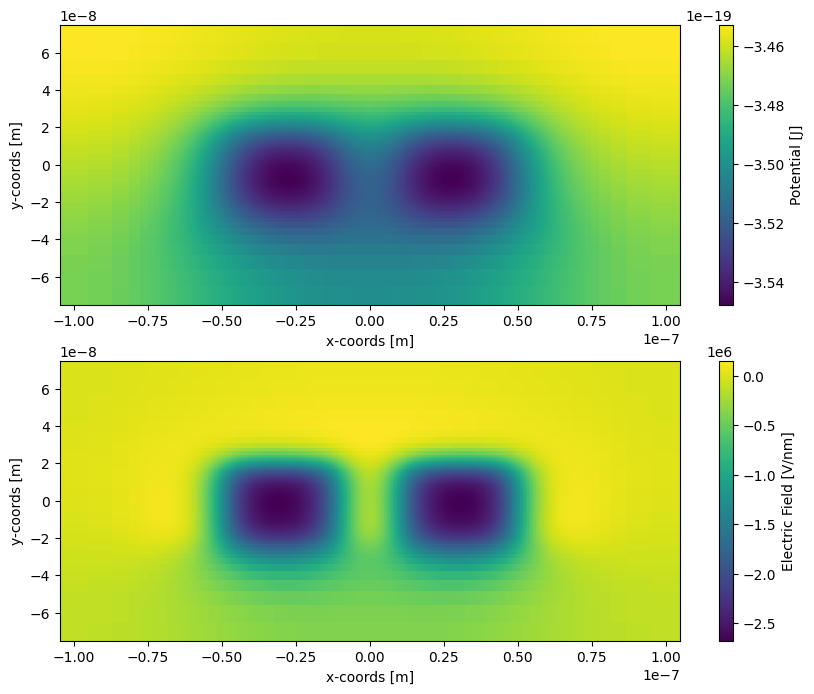

In [12]:
ctrl_val = [0.2,0.,0.2]

fig, axs = plt.subplots(2, 1, figsize=(10, 8))

pcm1 = axs[0].pcolormesh(potential.x_coords,potential.y_coords, potential(ctrl_val))
axs[0].set_xlabel('x-coords [m]')
axs[0].set_ylabel('y-coords [m]')

pcm2 = axs[1].pcolormesh(e_field.x_coords,e_field.y_coords, e_field(ctrl_val))
axs[1].set_xlabel('x-coords [m]')
axs[1].set_ylabel('y-coords [m]')

cbar1 = plt.colorbar(pcm1, ax=axs[0], label='Potential [J]')
cbar2 = plt.colorbar(pcm2, ax=axs[1], label='Electric Field [V/nm]')